# Kalman Filter in 1 Dimension

source:

`Kalman and Bayesian Filters in Python`; author: Roger R Labbe Jr

adapted from chapter 6 



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [18]:
class Sensor():
    def __init__(self, x0=0, velocity=1, dt=1, noise=0.0):
        """ 
        x0      : initial position
        velocity: (+=right, -=left)
        noise   : scaling factor for noise, 0== no noise
        """
        self.x = x0
        self.velocity = velocity
        self.noise = math.sqrt(noise)
        self.dt = dt

    def sense(self):
        # update position
        self.x = self.x + self.velocity * self.dt
        # position from sensor
        sensor_pos = self.x + np.random.randn() * self.noise
        return sensor_pos

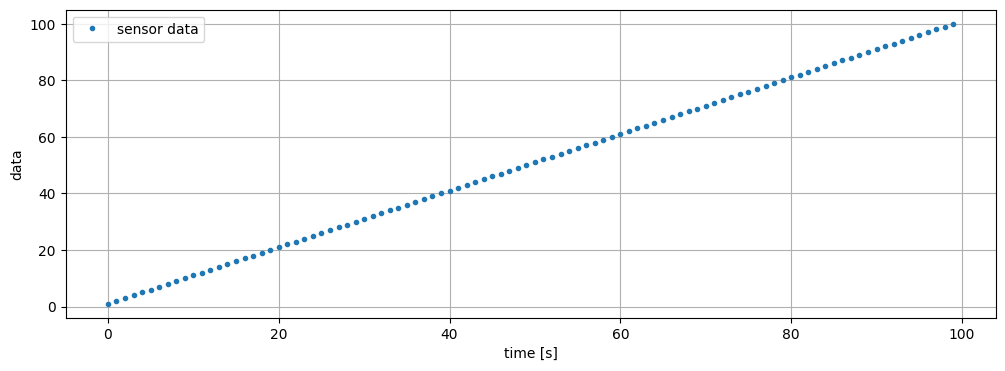

In [22]:
# test without noise
sensor = Sensor(x0=0, velocity=1, dt=1, noise=0.0)
N = 100
# sensor outputs are stored here
xs = []
for k in range(N):
    x = sensor.sense()
    xs.append(x)

tvec = np.arange(N)
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

ax1.plot(tvec, xs, linestyle='', marker='o', markersize=3, label='sensor data')
ax1.set_xlabel('time [s]')
ax1.set_ylabel('data')
ax1.set_title('')
ax1.legend()
ax1.grid(True)

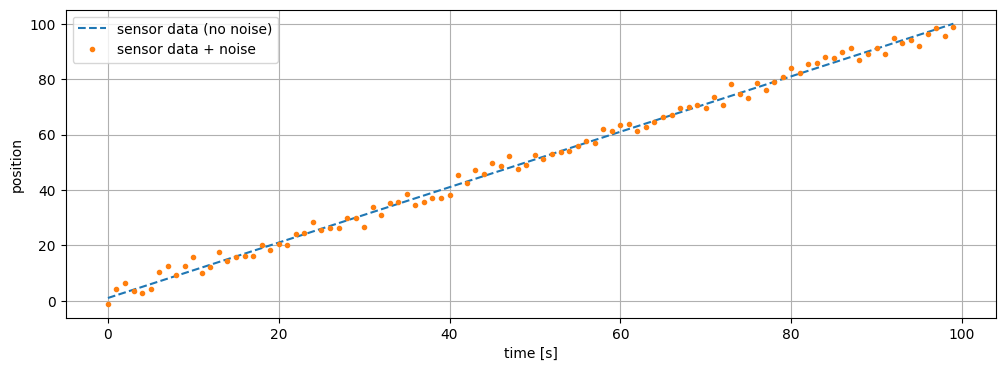

In [36]:
# same procedure but now with some noise
N = 100
sensor_noisy = Sensor(x0=0, velocity=1, dt=1, noise=4.0)
xs_noisy = []
for k in range(N):
    x = sensor_noisy.sense()
    xs_noisy.append(x)

tvec = np.arange(N)
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
ax2.plot(tvec, xs, linestyle='--', label='sensor data (no noise)')
ax2.plot(tvec, xs_noisy, linestyle='', marker='o', markersize=3, label='sensor data + noise')
ax2.set_xlabel('time [s]')
ax2.set_ylabel('position')
ax2.set_title('')
ax2.legend()
ax2.grid(True)